In [1]:
import numpy as np 
import scipy.constants as const 
import matplotlib.pyplot as plt 
import uncertainties as unc 
%matplotlib inline

In [2]:

PMT_response = np.array([
    [400, 0],
    [450, 0],
    [500, 10],
    [550, 20],
    [600, 40],
    [650, 70],
    [700, 125],
    [800, 375],
    [850, 500],
    [900, 900],
    [950, 1250]])
HV_bias = PMT_response[:,0]
peak_heights = PMT_response[:,1]

In [5]:
def powerlaw(K, n):
    return K*V**n

model = lmfit.Model(powerlaw)
print(model.param_names)

['n']


[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 834
    # data points      = 11
    # variables        = 2
    chi-square         = 6544.31811
    reduced chi-square = 727.146457
    Akaike info crit   = 74.2730294
    Bayesian info crit = 75.0688199
    R-squared          = 0.99636778
[[Variables]]
    K:  8.8711e-20 +/- 1.7447e-19 (196.68%) (init = 1)
    n:  7.44017114 +/- 0.28832296 (3.88%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(K, n) = -1.0000

K =  8.871052313721644e-20 +/- 1.7447359484178258e-19

n =  7.440171141872278 +/- 0.2883229555156851


Text(0.5, 1.0, 'High Voltage Bias v. Peak Heights')

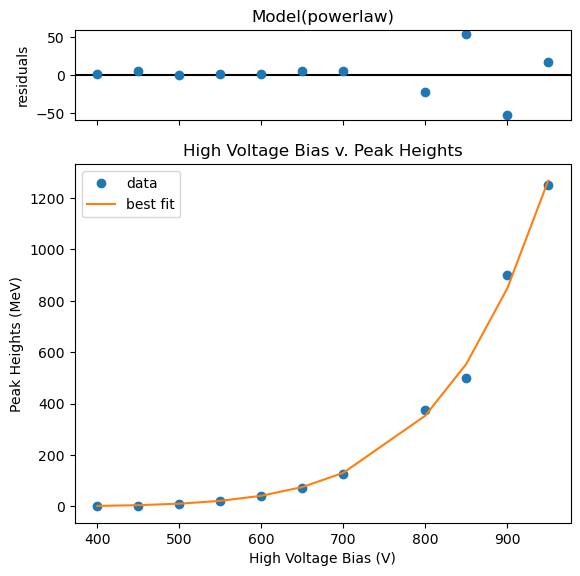

In [6]:
def powerlaw(V, K, n):
    return K*V**n

model = lmfit.Model(powerlaw)

param_guess = model.make_params(K=1, n=1)

line_fit = model.fit(peak_heights, param_guess, V=HV_bias)

print(line_fit.fit_report())

print('\nK = ',line_fit.params['K'].value,'+/-',line_fit.params['K'].stderr)
print('\nn = ',line_fit.params['n'].value,'+/-',line_fit.params['n'].stderr)

line_fit.plot()
plt.xlabel('High Voltage Bias (V)')
plt.ylabel('Peak Heights (MeV)')
plt.title('High Voltage Bias v. Peak Heights')


In [7]:
n=line_fit.params['n'].value
print("Calculated n value is", n, "which is comparable to the literature value of 7")

Calculated n value is 7.440171141872278 which is comparable to the literature value of 7


In [8]:
energies=[0.662, 0.551, 1.275, 1.173, 1.333]

In [9]:
from scipy.constants import c, electron_mass
unit_conversion = 6.242e12

def compton(energy):
    gamma = (energy*electron_mass*c**2*unit_conversion)/(electron_mass*c**2*unit_conversion+2*energy)
    edge = energy-gamma
    return edge

In [10]:
print(c)
print(electron_mass)
print(electron_mass*c**2*unit_conversion)

299792458.0
9.1093837015e-31
0.5110391425893469


In [11]:
compton_edges=compton(np.array(energies))
print(compton_edges)


[0.47763995 0.37643352 1.06213931 0.96318526 1.11858175]


In [13]:
isotopes = ["cesium", "sodium", "cobalt"]
energy=([0.662], [0.551, 1.275], [1.173, 1.333])
edges = list(compton_edges)

print('  Isotope | Energy        | Compton Edge (MeV) ')
print('----------|---------------|---------------')

    
index = 0
for isotope, edge in zip(isotopes, energy):
    for energy in edge:
        print(f' {isotope:<8} | {energy:<13.3f} | {compton_edges[index]:<.3f}')
        index += 1

  Isotope | Energy        | Compton Edge (MeV) 
----------|---------------|---------------
 cesium   | 0.662         | 0.478
 sodium   | 0.551         | 0.376
 sodium   | 1.275         | 1.062
 cobalt   | 1.173         | 0.963
 cobalt   | 1.333         | 1.119


In [14]:
peaks = np.array([102.06, 143.99, 349.23, 185.44, 321, 365.04])
delta_peaks = np.array([8.65, 11.46, 17.93, 12.94, 15.52, 16.69])
energies =  np.array([0.356, 0.511, 1.275, 0.662, 1.173, 1.333])

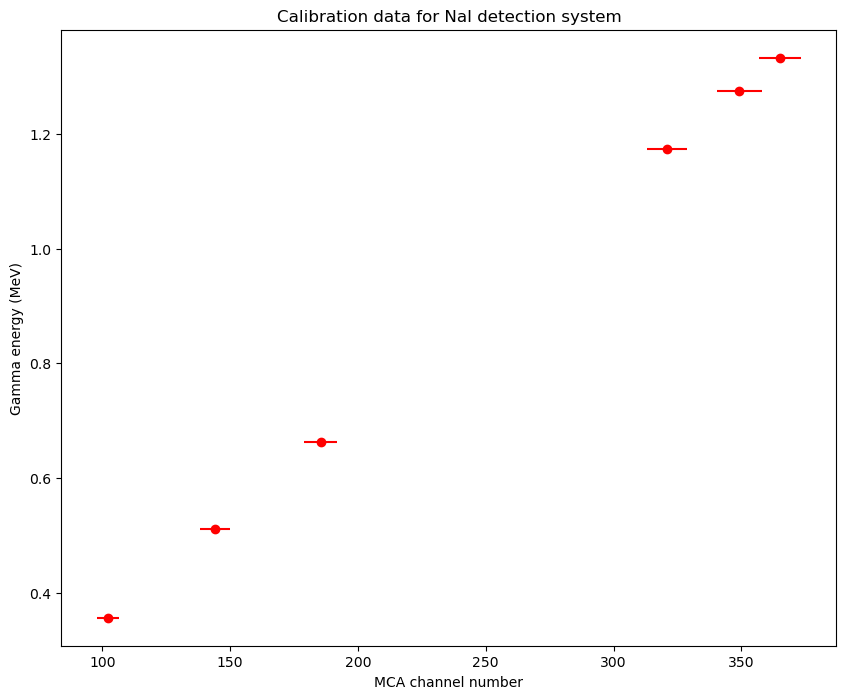

In [15]:
plt.figure(figsize=(10,8))
plt.xlabel('MCA channel number')
plt.ylabel('Gamma energy (MeV)')
plt.title('Calibration data for NaI detection system')
plt.errorbar(peaks,energies,xerr=delta_peaks/2,fmt='ro');

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 6
    # variables        = 2
    chi-square         = 2.1823e-05
    reduced chi-square = 5.4558e-06
    Akaike info crit   = -71.1458046
    Bayesian info crit = -71.5622856
    R-squared          = 0.99997589
[[Variables]]
    slope:      0.00372513 +/- 9.1454e-06 (0.25%) (init = 0.003725134)
    intercept: -0.02564626 +/- 0.00243056 (9.48%) (init = -0.02564626)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9198

Slope =  0.0037251340150958948 +/- 9.145439411911433e-06


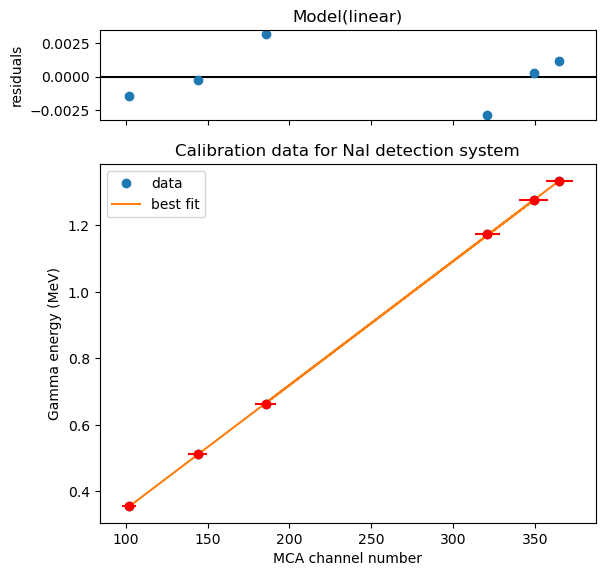

In [16]:
line = LinearModel()
param_guess = line.guess(energies, x=peaks)
line_fit = line.fit(energies, param_guess, x=peaks)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
line_fit.plot();

plt.xlabel('MCA channel number')
plt.ylabel('Gamma energy (MeV)')
plt.title('Calibration data for NaI detection system')
plt.errorbar(peaks,energies,xerr=delta_peaks/2,fmt='ro');

In [17]:
slope = line_fit.params['slope'].value
intercept = line_fit.params['intercept'].value

def channel_to_energy(channel):
    energy = channel*slope+intercept
    return energy

[0.3545409162503447, 0.5107357855033154, 1.275282290761597, 0.6651425904290403, 1.17012175751544, 1.334176659540263]
[0.2787238398445126, 0.48922781041696806, 1.1975743363297022, 0.6237498499701108, 0.8972745202697542, 1.0376588032224536]


Text(0.5, 1.0, 'Δ E^2 v. Energy')

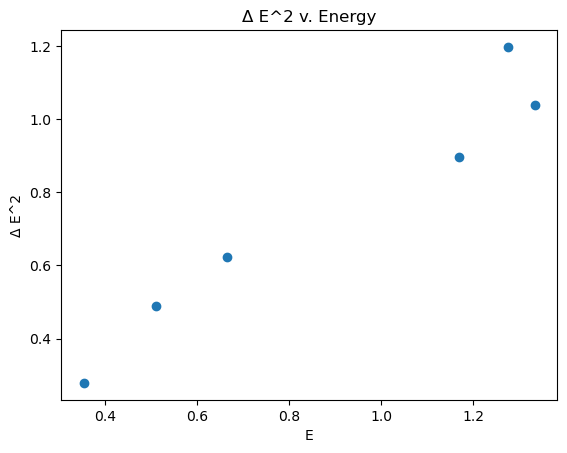

In [18]:
energy = []
for i in range(len(peaks)):
    energy.append(channel_to_energy(peaks[i]))
print(energy)

delta_energy = []
for i in range(len(delta_peaks)):
    delta_energy.append(slope*(delta_peaks[i])**2)
print(delta_energy)

plt.scatter(energy, delta_energy)
plt.ylabel("\u0394 E^2")
plt.xlabel('E')
plt.title('\u0394 E^2 v. Energy')

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 6
    # variables        = 2
    chi-square         = 0.03604005
    reduced chi-square = 0.00901001
    Akaike info crit   = -26.6893034
    Bayesian info crit = -27.1057844
    R-squared          = 0.94098615
[[Variables]]
    slope:      0.79678607 +/- 0.09976934 (12.52%) (init = 0.7967861)
    intercept:  0.04887919 +/- 0.09642525 (197.27%) (init = 0.04887919)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9157

Slope =  0.7967860654642427 +/- 0.09976934159837117


Text(0.5, 1.0, 'Δ E^2 v. Energy')

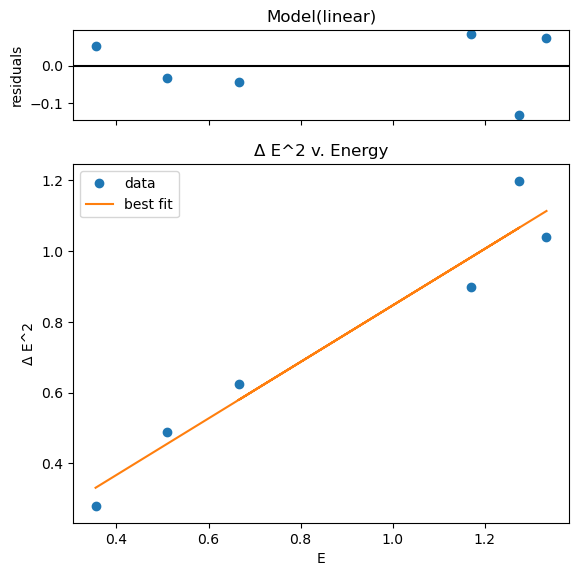

In [19]:
line = LinearModel()
param_guess = line.guess(delta_energy, x=energy)
line_fit = line.fit(delta_energy, param_guess, x=energy)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
line_fit.plot();

plt.ylabel("\u0394 E^2")
plt.xlabel('E')
plt.title('\u0394 E^2 v. Energy')

In [20]:
import uncertainties as unc
from uncertainties import ufloat

slope = ufloat(line_fit.params['slope'].value, line_fit.params['slope'].stderr)
Fw = slope/(2.35**2)

print('The estimated "Fano factor X energy per photoelectron" Fw = {:.2uP} eV'.format(Fw*1e6))

The estimated "Fano factor X energy per photoelectron" Fw = (1.44±0.18)×10⁵ eV
